Import libraries

In [36]:
import imutils
import cv2
import os
from imutils import paths
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D
from keras.models import Model
from sklearn.model_selection import train_test_split

import tensorflow as tf

Dataset preload

In [37]:
data_dir = "./Dataset/cad_classify_dataset/"
img_height = 256
img_width = 256
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3192 files belonging to 3 classes.
Using 2554 files for training.
Found 3192 files belonging to 3 classes.
Using 638 files for validation.


Dataset prewiev

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [39]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [40]:
#Normalization 255 to 1
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

1.0 1.0


In [41]:
#CACHE + PREFETCH
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [54]:
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(8, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [55]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [25]:
import keras
model = keras.models.load_model("./Train data/Classifier.keras")

In [56]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15


80/80 [==============================] - 23s 270ms/step - loss: 0.3489 - accuracy: 0.9440 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 2/15
80/80 [==============================] - 21s 268ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0062 - val_accuracy: 0.9969
Epoch 3/15
80/80 [==============================] - 34s 425ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.0056 - val_accuracy: 0.9969
Epoch 4/15
80/80 [==============================] - 69s 863ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.0024 - val_accuracy: 0.9984
Epoch 5/15
80/80 [==============================] - 69s 863ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0055 - val_accuracy: 0.9984
Epoch 6/15
80/80 [==============================] - 68s 856ms/step - loss: 0.0364 - accuracy: 0.9890 - val_loss: 0.0247 - val_accuracy: 0.9937
Epoch 7/15
80/80 [==============================] - 68s 845ms/step - loss: 0.0086 - accuracy: 0.9984 - val_loss: 7.4343e-04 - val_accuracy: 1.0000
Epoch 

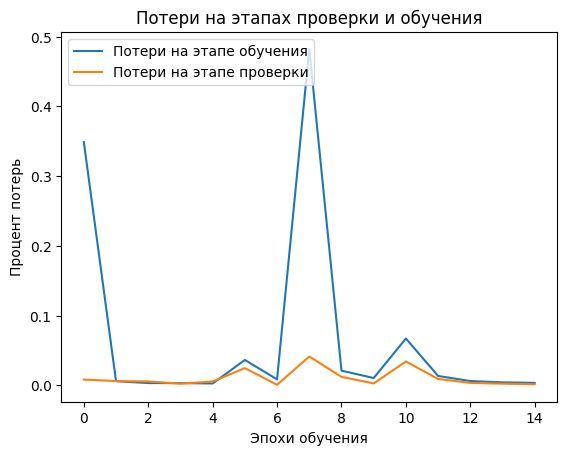

In [57]:
# PLOT HISTORY OF TRAIN
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери на этапах проверки и обучения')
plt.ylabel('Процент потерь')
plt.xlabel('Эпохи обучения')
plt.legend(['Потери на этапе обучения', 'Потери на этапе проверки'], loc='upper left')
plt.show()

In [11]:
model.save("./Train data/Classifier.keras")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")